In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
import numpy as np
import math
import pandas
from matplotlib import pyplot as plt
from PIL import Image
import os

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


RetiredCube_ImageGenFinished/0128.png


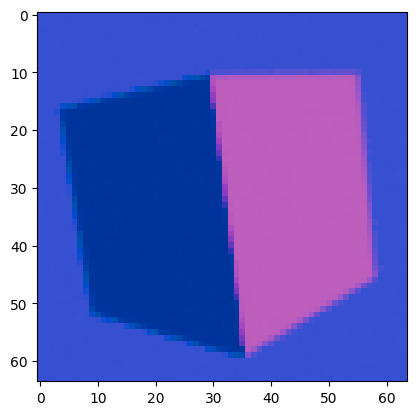

In [8]:
def GetImageAdress(input_number, additionalString = ""):
    return "RetiredCube_ImageGenFinished/" + additionalString + str(input_number).zfill(4) + ".png"
print(GetImageAdress(128, ""))

def GetImage(image_number,  additionalString = "" ):
    adress = GetImageAdress(image_number,  additionalString)
    image = Image.open(adress)
    image = np.array(image)
    image = image / 255
    image = image.astype('float32')
    return image
plt.imshow(GetImage(7725, "normal"))


In [79]:
all_albedos = list()
all_normals = list()
all_masks = list()
# answers start at 4775, end at 4799
answerHeadRotation = open("RetiredCube_ImageGenFinished\ImageAnswers.txt", "r").read()
answerHeadRotation = answerHeadRotation.split('Cube')
answerHeadRotation.pop(0)

for pictire in range( len(answerHeadRotation)):
    numnum = 7700 + pictire
    all_albedos.append(GetImage(numnum, "albedo"))
    all_normals.append(GetImage(numnum, "normal"))
    all_masks.append(GetImage(numnum, "mask"))

np.save('PreparedCube\CubeRotationDegrees.npy', np.array(answerHeadRotation))
np.save('PreparedCube\CubeAlbedos.npy', np.array(all_albedos))
np.save('PreparedCube\CubeNormals.npy', np.array(all_normals))
np.save('PreparedCube\CubeMasks.npy', np.array(all_masks))

In [76]:
answerLightRotation = open("RetiredCube_ImageGenFinished\ImageData.txt", "r").read()
answerLightRotation = answerLightRotation.split("VectorXYZ")
lightframes = answerLightRotation.pop(0)
lightjump = int(lightframes.split( "NumberOfLightJumps")[1])

all_labels = list()
all_vectors = list()

for dd in range(len(answerLightRotation)):
    all_labels.append(answerHeadRotation[dd // lightjump])
    vector = answerLightRotation[dd].split("_")
    all_vectors.append(np.array(vector).astype("float16"))

np.save('PreparedCube\CubeLabels.npy', np.array(all_labels))
np.save('PreparedCube\CubeVectors.npy', np.array(all_vectors))

In [77]:
all_photos = list()
for pictire in range( len(answerLightRotation)):
    all_photos.append(GetImage(pictire, ""))
all_photos_array = np.array(all_photos)
np.save('PreparedCube\CubePhotos.npy', np.array(all_photos_array))

[0.035 0.    0.999] -80_-80


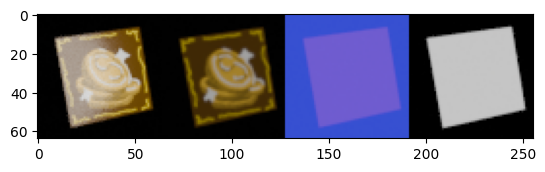

In [78]:
numnum = 32
print(all_vectors[numnum], all_labels[numnum])
plt.imshow(np.concatenate([all_photos[numnum], all_albedos[numnum // 77],all_normals[numnum // 77],all_masks[numnum // 77]], axis=1))